In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

df = pd.read_csv(r'C:\Users\Shivam kumar\Desktop\PROJECT\Customer Categorization\Customer-Categorization\Notebook\data\clustered_data.csv')

df.shape

(2240, 22)

In [3]:
df.head()

,Age,Education,Marital_Status,Parental_Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount_Purchases,Total_Promo,NumWebVisitsMonth,cluster
0,69,2,0,0,0,58138.0,1617.0,4896,58,635,81,546,120.5,81,88.0,8,10,4,3,0,7,2
1,72,2,0,1,2,46344.0,27.0,4346,38,11,1,6,2.0,1,6.0,1,1,2,2,0,5,1
2,61,2,1,0,0,71613.0,776.0,4545,26,426,49,127,111.0,21,42.0,8,2,10,1,0,4,2
3,42,2,1,1,1,26646.0,53.0,4372,26,11,4,20,10.0,3,5.0,2,0,4,2,0,6,1
4,45,4,1,1,1,58293.0,422.0,4394,94,173,43,118,46.0,27,15.0,5,3,6,5,0,5,0


In [4]:
# spliting data into X and y
X = df.drop('cluster', axis=1)
y = df['cluster']

**HYPER-PARAMETER TUNING**


Selecting the model that is best for our data


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
    roc_auc_score, roc_curve, precision_score, recall_score, f1_score, confusion_matrix

from xgboost import XGBClassifier
from sklearn import metrics

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier()
}

In [6]:
# function to train and evaluate models

def evaluate_models(x,y,models):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    models_list = []
    scores = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(x_train,y_train)

        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)

        model_name = list(models.keys())[i]
        print(f"\n---- score for {model_name} ----")
        print(f"Accuracy: {accuracy}")
        models_list.append(model_name)
        scores.append(accuracy)
    
    print()

    report = pd.DataFrame()
    report['Model_Name'] = models_list
    report['Accuracy_Score'] = scores
    return report

In [7]:
models_accuracy = evaluate_models(X, y, models)


---- score for Random Forest ----
Accuracy: 0.9665178571428571

---- score for Logistic Regression ----
Accuracy: 0.8772321428571429

---- score for Gradient Boosting ----
Accuracy: 0.9732142857142857

---- score for AdaBoost Classifier ----
Accuracy: 0.9441964285714286

---- score for K-Neighbors Classifier ----
Accuracy: 0.8214285714285714

---- score for Decision Tree ----
Accuracy: 0.9441964285714286

---- score for XGBClassifier ----
Accuracy: 0.9665178571428571



In [8]:
models_accuracy.sort_values(by='Accuracy_Score', ascending=False)

,Model_Name,Accuracy_Score
2,Gradient Boosting,0.973214
0,Random Forest,0.966518
6,XGBClassifier,0.966518
5,Decision Tree,0.944196
3,AdaBoost Classifier,0.944196
1,Logistic Regression,0.877232
4,K-Neighbors Classifier,0.821429


Continue Training our model using random forest

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
x_train.head()

,Age,Education,Marital_Status,Parental_Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount_Purchases,Total_Promo,NumWebVisitsMonth
1315,64,4,0,1,2,27238.0,57.0,4668,39,37,0,17,0.0,0,3.0,3,0,3,3,0,9
2220,47,2,1,1,1,58025.0,470.0,4448,81,270,31,88,11.0,48,22.0,3,2,10,3,0,4
889,48,3,0,0,0,68092.0,1281.0,4428,7,852,60,207,78.0,36,48.0,2,6,10,2,0,5
780,52,4,0,0,0,71466.0,1230.0,4318,86,412,12,546,78.0,81,0.0,4,4,10,1,0,1
2021,44,3,1,1,1,43815.0,79.0,4683,53,14,10,29,4.0,7,15.0,2,0,3,1,0,6


Now doing hypertuning

using GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)


In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [14]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)


In [15]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each

In [16]:
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.9642857142857142


In [17]:
best_rf = grid_search.best_estimator_


In [18]:
from sklearn.metrics import accuracy_score

y_pred = best_rf.predict(x_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Test accuracy: 0.975


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       197
           1       1.00      0.97      0.98       209
           2       0.98      0.97      0.98       154

    accuracy                           0.97       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.97      0.98       560



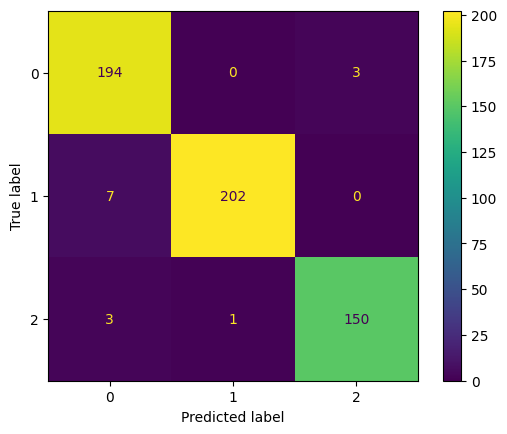

In [20]:
ConfusionMatrixDisplay.from_estimator(best_rf,x_test,y_test)

In [22]:
import pickle

pickle.dump(best_rf, open("random_forest_model.pkl", "wb"))